# Week 3 Assignment

### 1. ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [2]:
df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [3]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['hour_beginning'])


<ipython-input-3-08bbea82338c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['hour_beginning'])


In [4]:
print(df['Date'])

0       2019-04-30 00:00:00
1       2019-12-31 22:00:00
2       2019-12-31 23:00:00
3       2019-12-31 21:00:00
4       2019-04-01 03:00:00
                ...        
16052   2018-06-22 04:00:00
16053   2018-07-19 06:00:00
16054   2018-06-16 16:00:00
16055   2018-07-24 18:00:00
16056   2018-07-23 00:00:00
Name: Date, Length: 16057, dtype: datetime64[ns]


In [5]:
# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [6]:
print(df['DayOfWeek'])

0        1
1        1
2        1
3        1
4        0
        ..
16052    4
16053    3
16054    5
16055    1
16056    0
Name: DayOfWeek, Length: 16057, dtype: int32


In [7]:
# Filter for weekdays
weekday_df = df[df['DayOfWeek'] < 5]

# Group by day of the week and sum pedestrian counts
weekday_counts = weekday_df.groupby('DayOfWeek')['Pedestrians'].sum()


In [8]:
print(weekday_counts)

DayOfWeek
0    1481435
1    1394963
2    1310900
3    1370880
4    1588068
Name: Pedestrians, dtype: int64


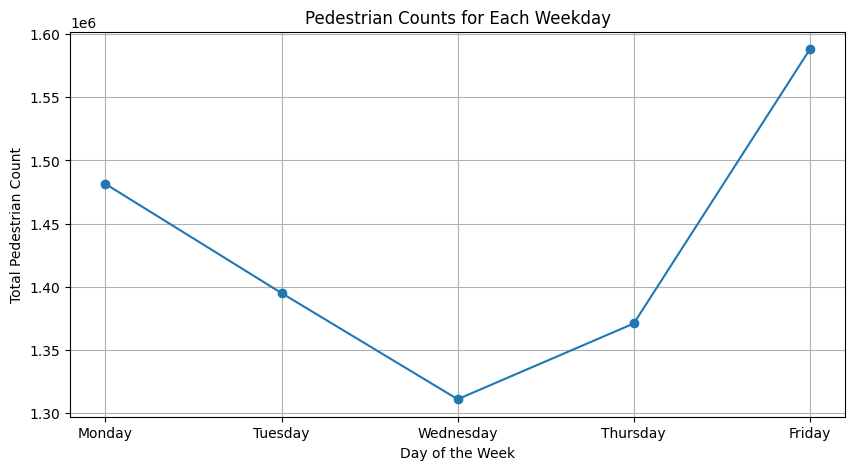

In [9]:
# Plot the pedestrian counts for each weekday
plt.figure(figsize=(10, 5))
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], weekday_counts, marker='o', linestyle='-')
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts for Each Weekday")
plt.grid()
plt.show()

### 2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [16]:
import seaborn as sns

In [20]:
# Filter data for Brooklyn Bridge and the year 2019
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df_brooklyn_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

<ipython-input-20-551f4713bf65>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


In [21]:
# Perform one-hot encoding for weather summary
weather_encoded = pd.get_dummies(df_brooklyn_2019['weather_summary'])

# Combine encoded weather data with pedestrian counts
df_weather = pd.concat([df_brooklyn_2019['Pedestrians'], weather_encoded], axis=1)

print(df_weather)

      Pedestrians  clear-day  clear-night  cloudy    fog  partly-cloudy-day  \
0               3      False        False   False  False              False   
1              10      False        False    True  False              False   
2               2      False        False    True  False              False   
3              12      False        False    True  False              False   
4               1      False         True   False  False              False   
...           ...        ...          ...     ...    ...                ...   
8756         1388       True        False   False  False              False   
8757          305      False        False   False  False               True   
8758            0      False         True   False  False              False   
8759         1437      False        False    True  False              False   
8760          981      False        False   False  False               True   

      partly-cloudy-night   rain  sleet   snow   wi

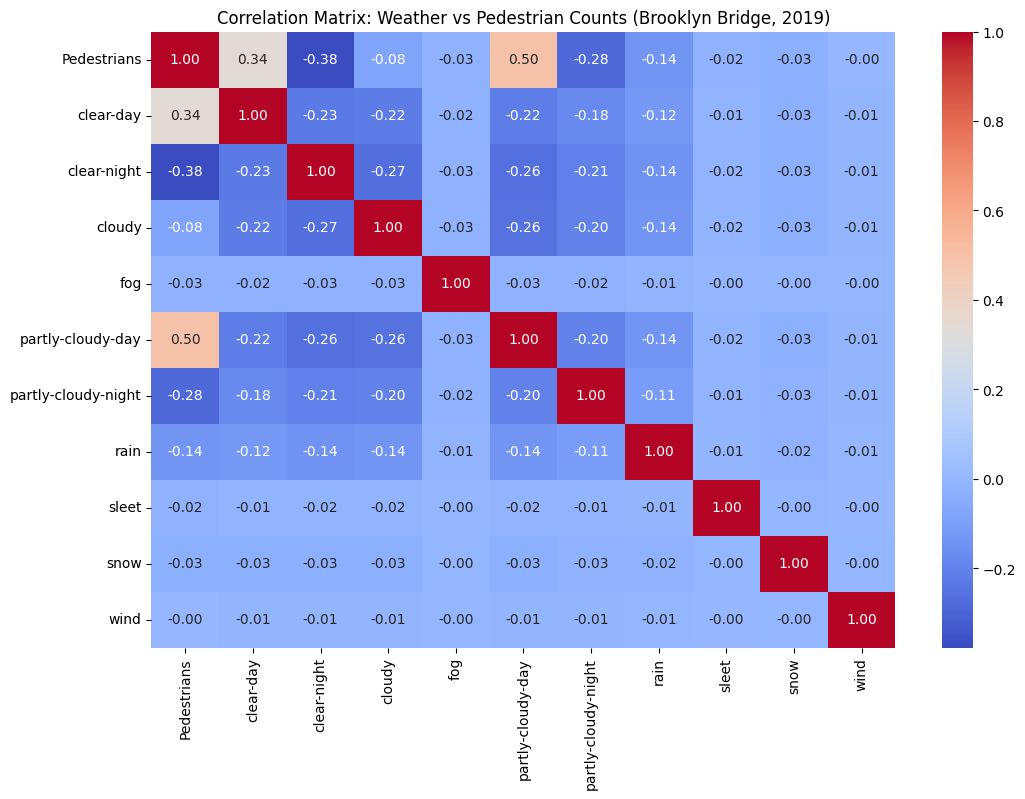

In [22]:
# Calculate correlation matrix
correlation_matrix = df_weather.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Weather vs Pedestrian Counts (Brooklyn Bridge, 2019)')
plt.show()

### 3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [23]:
# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'


In [24]:
# Apply the function to create a new column and analyze
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)
time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])


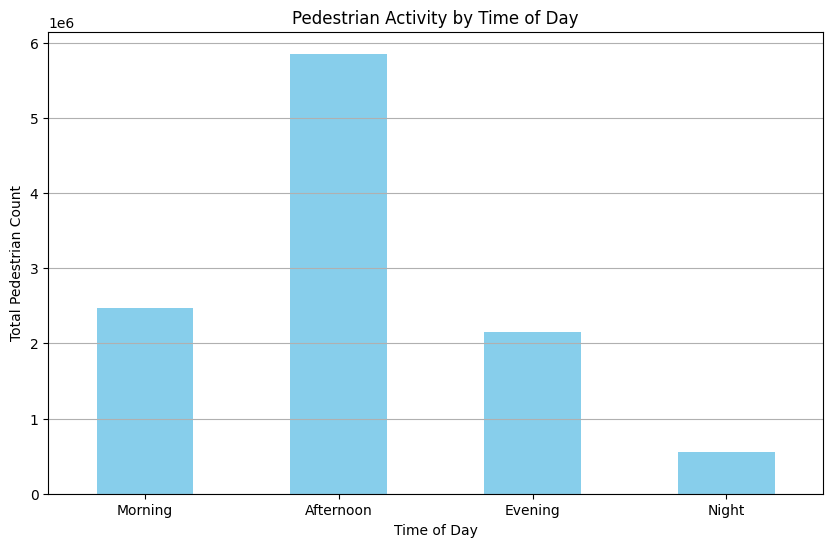

In [25]:
# Plot the results
plt.figure(figsize=(10, 6))
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()